C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4.0


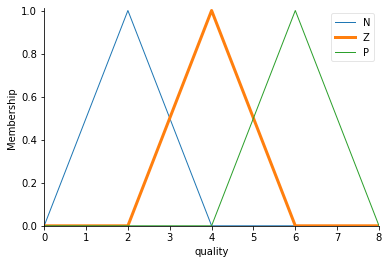

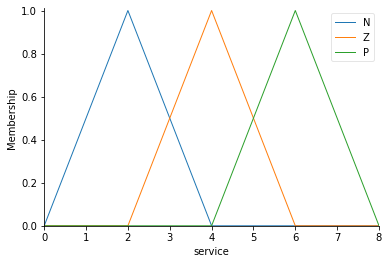

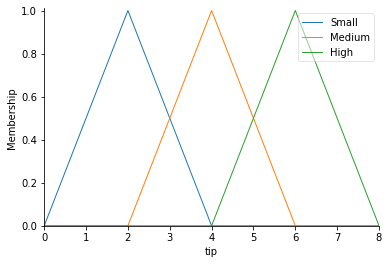

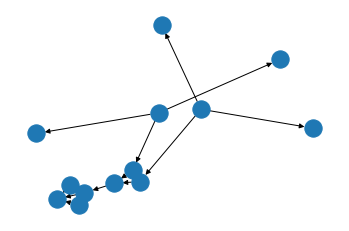

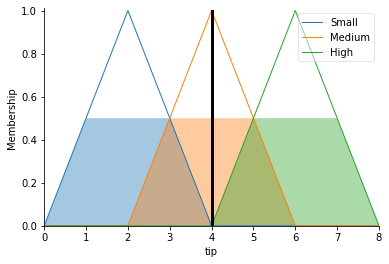

In [4]:
    import numpy as np
    import skfuzzy as fuzz
    from skfuzzy import control as ctrl
     
    # New Antecedent/Consequent objects hold universe variables and membership
    # functions
    quality = ctrl.Antecedent(np.arange(0, 9, 1), 'quality')
    service = ctrl.Antecedent(np.arange(0, 9, 1), 'service')
    tip = ctrl.Consequent(np.arange(0, 9, 1), 'tip')
    
    # Auto-membership function population is possible with .automf(3, 5, or 7)
    # quality.automf(3)
    # service.automf(3)
    
    # Custom membership functions can be built interactively with a familiar,
    # Pythonic API
    
    # Graph \INPUT.X\
    quality['N'] = fuzz.trimf(quality.universe, [0, 2, 4]) 
    quality['Z'] = fuzz.trimf(quality.universe, [2, 4, 6])
    quality['P'] = fuzz.trimf(quality.universe, [4, 6, 8])
    
    # Graph \INPUT.Y\ 
    service['N'] = fuzz.trimf(service.universe, [0, 2, 4])
    service['Z'] = fuzz.trimf(service.universe, [2, 4, 6])
    service['P'] = fuzz.trimf(service.universe, [4, 6, 8]) 
    
    # Graph \OUTPUT.Z\ 
    tip['Small'] = fuzz.trimf(tip.universe, [0, 2, 4])
    tip['Medium'] = fuzz.trimf(tip.universe, [2, 4, 6])
    tip['High'] = fuzz.trimf(tip.universe, [4, 6, 8]) 
    
    # You can see how these look with .view()
    quality['Z'].view()
    service.view()
    tip.view()
    
    # Column N
    rule1 = ctrl.Rule(quality['N'] | service['N'], tip['Small'])
    rule2 = ctrl.Rule(quality['N'] & service['Z'], tip['Medium'])
    rule3 = ctrl.Rule(quality['N'] & service['P'], tip['Medium'])
    
    # Column Z
    rule4 = ctrl.Rule(quality['Z'] & service['N'], tip['Medium'])
    rule5 = ctrl.Rule(quality['Z'] | service['Z'], tip['High'])
    rule6 = ctrl.Rule(quality['Z'] & service['P'], tip['High'])
    
    # Column P
    rule7 = ctrl.Rule(quality['P'] & service['N'], tip['Medium'])
    rule8 = ctrl.Rule(quality['P'] & service['Z'], tip['High'])
    rule9 = ctrl.Rule(quality['P'] | service['P'], tip['High'])
    
    rule1.view()
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,
                                       rule4, rule5, rule6,
                                       rule7, rule8, rule9])
    
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    tipping.input['quality'] = 3
    tipping.input['service'] = 5
    
    tipping.compute()
    print(tipping.output['tip'])
    tip.view(sim=tipping)